<a href="https://colab.research.google.com/github/tanongsakintean/google_colab/blob/main/SentimentIntensityAnalyzer_VS_TextBlob_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import spacy # another function for NLP
import nltk
import en_core_web_sm

# โหลดโมเดล NLP สำหรับภาษาอังกฤษ (English) ของ library spacy
nlp = en_core_web_sm.load()  # Loading english large corpus


In [2]:
from google.colab import drive
drive.mount('/content/drive') #ระวังเครื่องหมาย ‘ กับ ' ต่างกันนะคะ

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/dataset/Instruments_Reviews_two_column.csv'
df_raw = pd.read_csv(path) ## Dataset is now stored in a Pandas Dataframe
df_raw

,reviewText,overall
0,"Not much to write about here, but it does exac...",5
1,The product does exactly as it should and is q...,5
2,The primary job of this device is to block the...,5
3,Nice windscreen protects my MXL mic and preven...,5
4,This pop filter is great. It looks and perform...,5
...,...,...
1994,This is nearly identical to theGuardian Cases ...,3
1995,When I was looking for a Bass Case I just want...,4
1996,These are by no means touring cases. They're i...,4
1997,I had a Cannon brand clutch and I bought this ...,5


In [4]:
df_raw.head()

,reviewText,overall
0,"Not much to write about here, but it does exac...",5
1,The product does exactly as it should and is q...,5
2,The primary job of this device is to block the...,5
3,Nice windscreen protects my MXL mic and preven...,5
4,This pop filter is great. It looks and perform...,5


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  1999 non-null   object
 1   overall     1999 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [6]:
df_raw.isnull().sum() # We do not have null values

reviewText    0
overall       0
dtype: int64

In [7]:
df_raw["sentiment"] = df_raw["overall"].apply(lambda x: 'positive' if x > 4 else ('neutral' if x == 3 else 'negative'))


In [8]:
df_raw

,reviewText,overall,sentiment
0,"Not much to write about here, but it does exac...",5,positive
1,The product does exactly as it should and is q...,5,positive
2,The primary job of this device is to block the...,5,positive
3,Nice windscreen protects my MXL mic and preven...,5,positive
4,This pop filter is great. It looks and perform...,5,positive
...,...,...,...
1994,This is nearly identical to theGuardian Cases ...,3,neutral
1995,When I was looking for a Bass Case I just want...,4,negative
1996,These are by no means touring cases. They're i...,4,negative
1997,I had a Cannon brand clutch and I bought this ...,5,positive


In [9]:
df_counts = df_raw["sentiment"].value_counts().reset_index()
df_counts.head()


,index,sentiment
0,positive,1366
1,negative,494
2,neutral,139


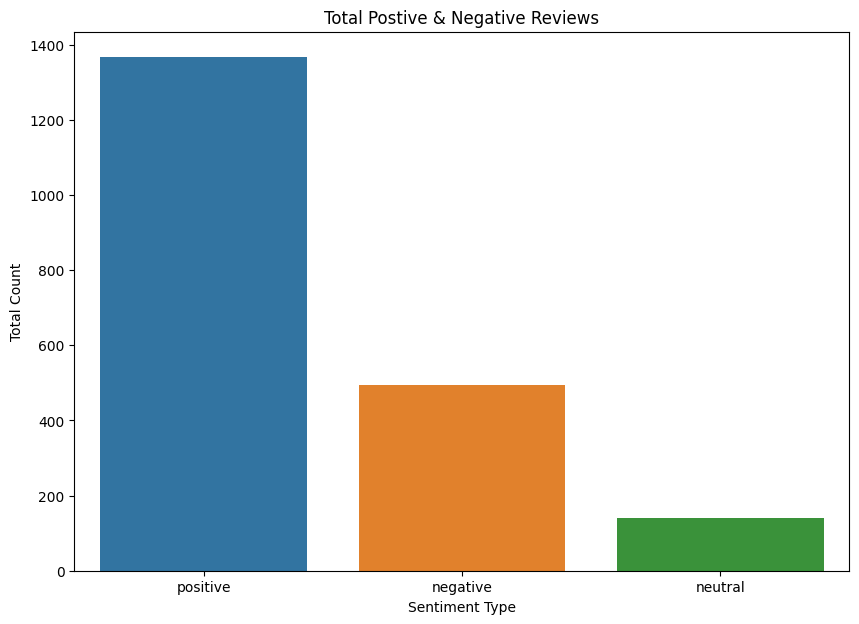

In [10]:
# So we can say that we almost have same number of reviews. That mean we have very good data.
plt.figure(figsize=(10, 7))
sns.barplot(data=df_counts, x='index', y='sentiment')
plt.xlabel("Sentiment Type");
plt.ylabel("Total Count");
plt.title("Total Postive & Negative Reviews");

In [11]:
#The itertuples() function is used to iterate over DataFrame rows as namedtuples. If True, return the index as the first element of the tuple. The name of the returned namedtuples or None to return regular tuples.
empty_review_index = []
for reviewText in df_raw.itertuples():
    # if review type is string
    if type(reviewText) == str:
        #if review is empty space
        if review.isspace():
            # Appent its index to the list
            empty_review_index.append(i)

In [12]:
empty_review_index # So we do not have any empty review

[]

In [13]:
import re # for regular expression

In [14]:
pos_token = [] # to save positive tokens
neg_token = [] # to save negative tokens
neu_token = []
corpus=[]
noun = []
def process_reviews(df):
    for index, reviewText,overall,sentiment in df.itertuples():
        if type(reviewText) == str:
            reviewText = re.sub('[^a-zA-Z]', ' ', reviewText)
            reviewText = reviewText.lower()
            doc = nlp(reviewText) #nlp("...") ถูกใช้เพื่อประมวลผลข้อความและสร้าง doc ที่เก็บข้อมูลเกี่ยวกับข้อความที่ถูกประมวลผลและสามารถใช้ในการวิเคราะห์ข้อความต่อไปได้.
            temp = []
            for token in doc:
                if not token.text.isspace():
                    if not token.is_stop and len(token.text) > 2:

                      if token.pos_ == 'NOUN':
                        noun.append(token.text)
                      if sentiment == "positive":
                          pos_token.append(token.text)
                      elif sentiment == "neutral":
                          neu_token.append(token.text)
                      else:
                          neg_token.append(token.text)
                      temp.append(token.lemma_)
                      corpus.append(' '.join(temp))


In [15]:
process_reviews(df_raw)

In [16]:
# all the negative token list
neg_token[0:10]

['got',
 'needed',
 'found',
 'don',
 'need',
 'rarely',
 'use',
 'good',
 'need',
 'keyboard']

In [17]:
# all the positive token list
pos_token[0:10]

['write',
 'exactly',
 'supposed',
 'filters',
 'pop',
 'sounds',
 'recordings',
 'crisp',
 'lowest',
 'prices']

In [18]:
# all the positive token list
neu_token[0:10]

['use',
 'cable',
 'run',
 'output',
 'pedal',
 'chain',
 'input',
 'fender',
 'amp',
 'bought']

In [19]:
from nltk import FreqDist

In [20]:
# preparing frequency distribution variables
freq_pos = FreqDist(pos_token)
freq_neg = FreqDist(neg_token)
freq_neu = FreqDist(neu_token)

In [21]:
freq_pos

FreqDist({'guitar': 851, 'strings': 729, 'great': 560, 'sound': 450, 'good': 445, 'like': 435, 'use': 418, 'picks': 296, 'string': 234, 'price': 222, ...})

In [22]:
freq_neg

FreqDist({'guitar': 278, 'strings': 265, 'like': 219, 'good': 214, 'use': 183, 'sound': 176, 'great': 142, 'pedal': 129, 'don': 119, 'little': 117, ...})

In [23]:
freq_neu

FreqDist({'strings': 104, 'guitar': 88, 'use': 69, 'good': 69, 'like': 67, 'sound': 54, 'string': 43, 'better': 41, 'pedal': 36, 'don': 36, ...})

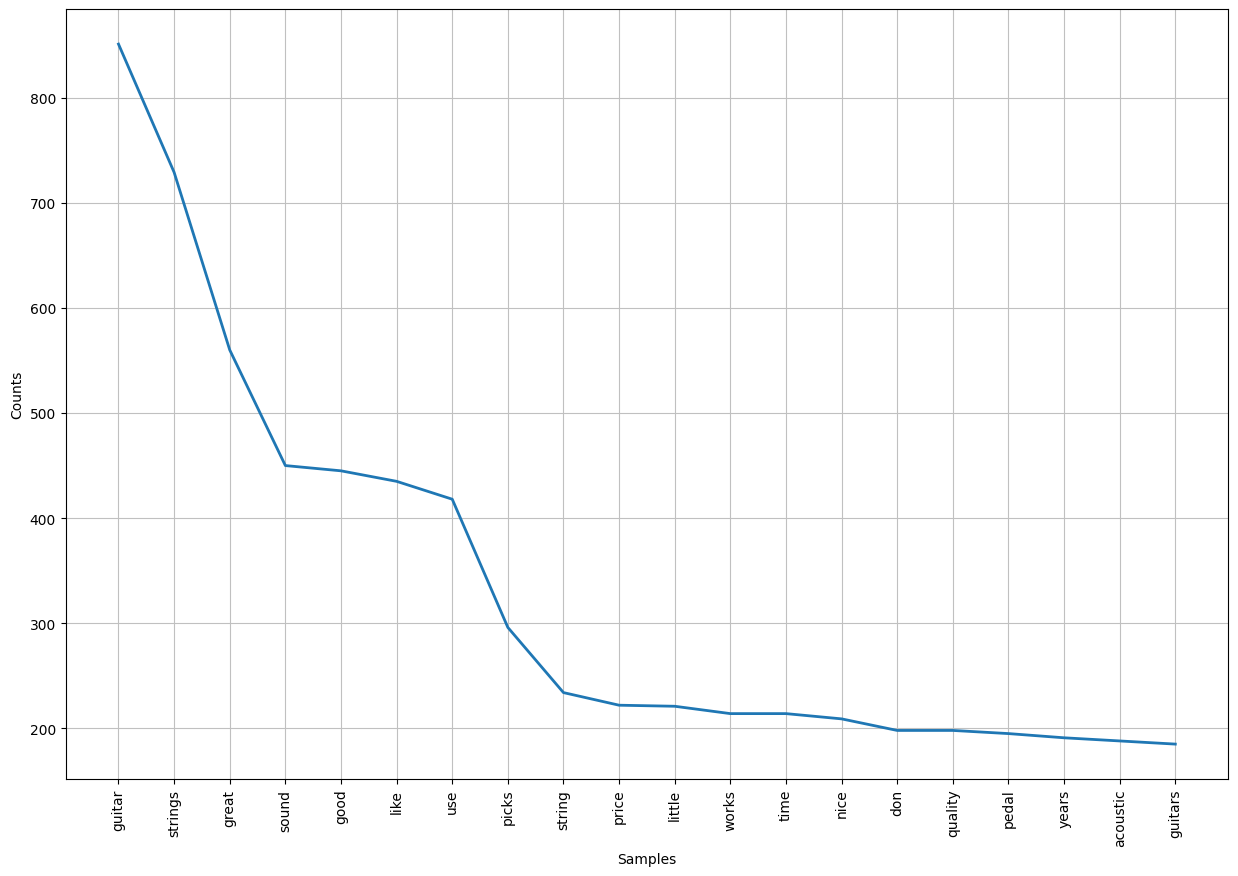

<Axes: xlabel='Samples', ylabel='Counts'>

In [24]:
# Top 20 most repeated words in positive comments
plt.figure(figsize=(15, 10))
freq_pos.plot(20)

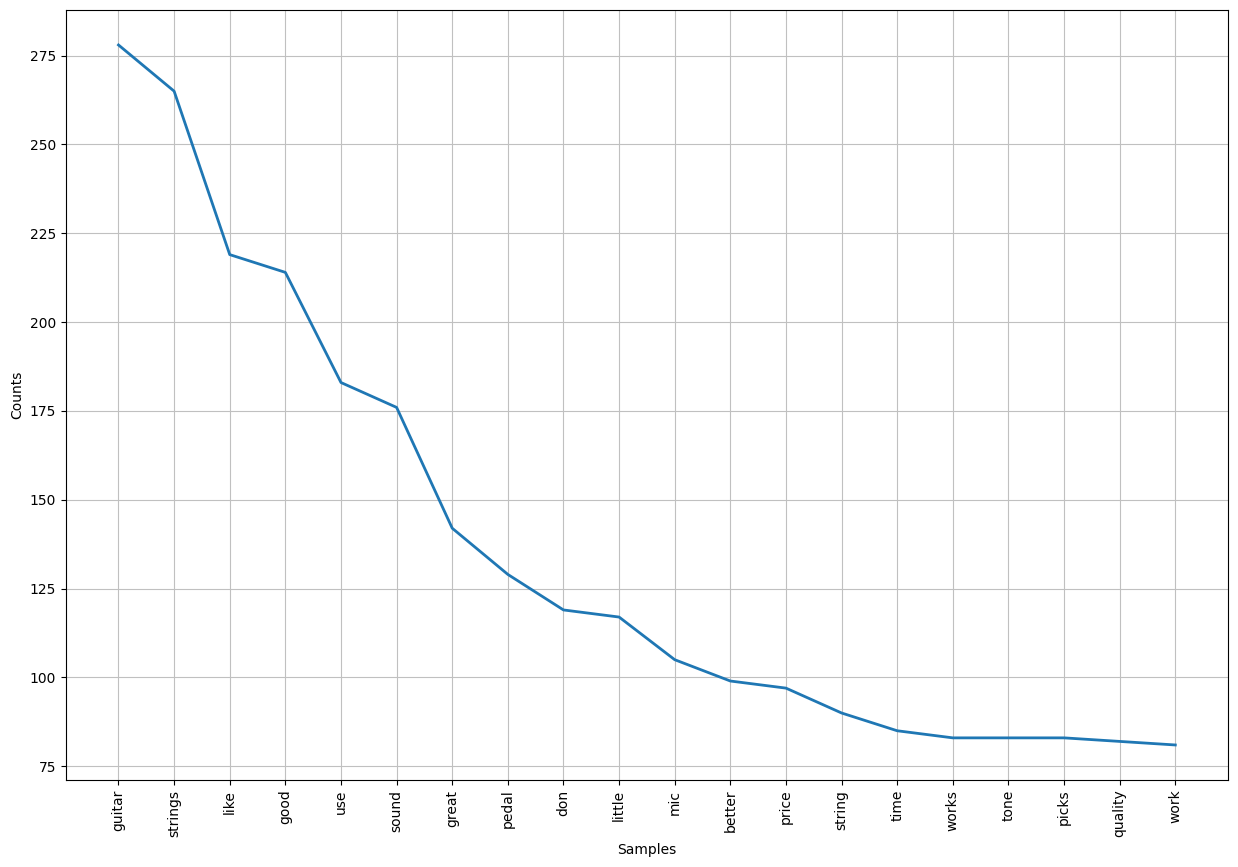

<Axes: xlabel='Samples', ylabel='Counts'>

In [25]:
# top 20 most repeated words in negative comments
plt.figure(figsize=(15, 10))
freq_neg.plot(20)

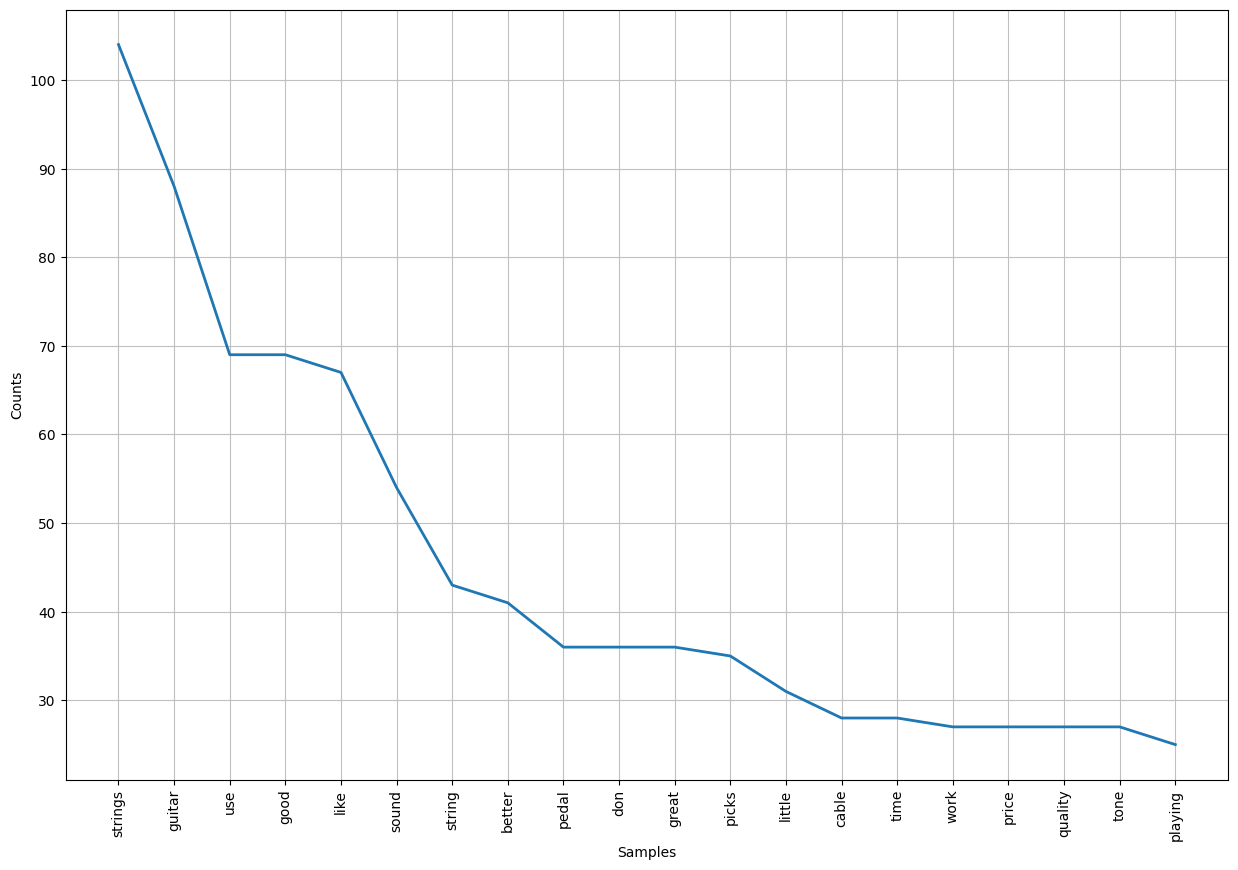

<Axes: xlabel='Samples', ylabel='Counts'>

In [26]:
# top 20 most repeated words in negative comments
plt.figure(figsize=(15, 10))
freq_neu.plot(20)

In [27]:
# All the nouns used in our reviews. It will give you an idea like what are the famous keywords?
noun[0:10]

['pop',
 'recordings',
 'prices',
 'filters',
 'pricing',
 'product',
 'bonus',
 'screens',
 'hint',
 'smell']

In [28]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

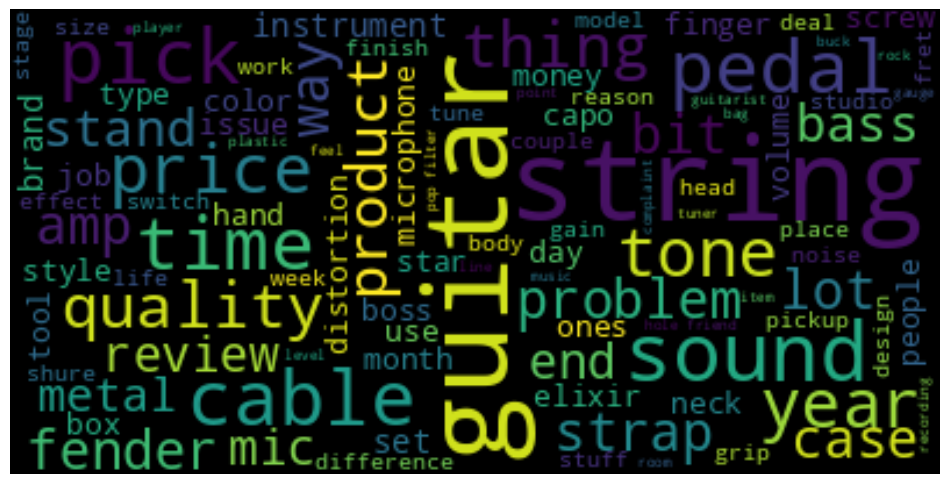

In [29]:
# Most famous nouns used in movie reviews

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(' '.join(noun))
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation="bilinear") # การแก้ไขรูปภาพจะเป็นวิธี bilinear
plt.axis("off")
plt.show()


In [75]:
df_raw

,reviewText,overall,sentiment,Subjectivity,Polarity,sentiment_TextBlob_score,score,sentiment_score
0,"Not much to write about here, but it does exac...",5,positive,0.398611,0.250000,positive,"{'neg': 0.057, 'neu': 0.79, 'pos': 0.153, 'com...",pos
1,The product does exactly as it should and is q...,5,positive,0.394444,0.052778,positive,"{'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'comp...",pos
2,The primary job of this device is to block the...,5,positive,0.434286,0.167500,positive,"{'neg': 0.113, 'neu': 0.858, 'pos': 0.029, 'co...",neg
3,Nice windscreen protects my MXL mic and preven...,5,positive,0.925000,0.200000,positive,"{'neg': 0.055, 'neu': 0.746, 'pos': 0.199, 'co...",pos
4,This pop filter is great. It looks and perform...,5,positive,0.750000,0.800000,positive,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'comp...",pos
...,...,...,...,...,...,...,...,...
1994,This is nearly identical to theGuardian Cases ...,3,neutral,0.437615,0.073011,positive,"{'neg': 0.032, 'neu': 0.872, 'pos': 0.096, 'co...",pos
1995,When I was looking for a Bass Case I just want...,4,negative,0.554167,0.100000,positive,"{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'comp...",pos
1996,These are by no means touring cases. They're i...,4,negative,0.552121,0.289970,positive,"{'neg': 0.051, 'neu': 0.823, 'pos': 0.127, 'co...",pos
1997,I had a Cannon brand clutch and I bought this ...,5,positive,0.325926,0.096296,positive,"{'neg': 0.057, 'neu': 0.816, 'pos': 0.127, 'co...",pos


In [76]:
#sentiment analysis with TextBlob
from textblob import TextBlob
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df_raw['Subjectivity'] = df_raw["reviewText"].apply(getSubjectivity)
df_raw['Polarity'] = df_raw["reviewText"].apply(getPolarity)

df_raw

,reviewText,overall,sentiment,Subjectivity,Polarity,sentiment_TextBlob_score,score,sentiment_score
0,"Not much to write about here, but it does exac...",5,positive,0.398611,0.250000,positive,"{'neg': 0.057, 'neu': 0.79, 'pos': 0.153, 'com...",pos
1,The product does exactly as it should and is q...,5,positive,0.394444,0.052778,positive,"{'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'comp...",pos
2,The primary job of this device is to block the...,5,positive,0.434286,0.167500,positive,"{'neg': 0.113, 'neu': 0.858, 'pos': 0.029, 'co...",neg
3,Nice windscreen protects my MXL mic and preven...,5,positive,0.925000,0.200000,positive,"{'neg': 0.055, 'neu': 0.746, 'pos': 0.199, 'co...",pos
4,This pop filter is great. It looks and perform...,5,positive,0.750000,0.800000,positive,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'comp...",pos
...,...,...,...,...,...,...,...,...
1994,This is nearly identical to theGuardian Cases ...,3,neutral,0.437615,0.073011,positive,"{'neg': 0.032, 'neu': 0.872, 'pos': 0.096, 'co...",pos
1995,When I was looking for a Bass Case I just want...,4,negative,0.554167,0.100000,positive,"{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'comp...",pos
1996,These are by no means touring cases. They're i...,4,negative,0.552121,0.289970,positive,"{'neg': 0.051, 'neu': 0.823, 'pos': 0.127, 'co...",pos
1997,I had a Cannon brand clutch and I bought this ...,5,positive,0.325926,0.096296,positive,"{'neg': 0.057, 'neu': 0.816, 'pos': 0.127, 'co...",pos


In [77]:
df_raw["sentiment_TextBlob_score"] = df_raw["Polarity"].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))

In [78]:
df_raw

,reviewText,overall,sentiment,Subjectivity,Polarity,sentiment_TextBlob_score,score,sentiment_score
0,"Not much to write about here, but it does exac...",5,positive,0.398611,0.250000,positive,"{'neg': 0.057, 'neu': 0.79, 'pos': 0.153, 'com...",pos
1,The product does exactly as it should and is q...,5,positive,0.394444,0.052778,positive,"{'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'comp...",pos
2,The primary job of this device is to block the...,5,positive,0.434286,0.167500,positive,"{'neg': 0.113, 'neu': 0.858, 'pos': 0.029, 'co...",neg
3,Nice windscreen protects my MXL mic and preven...,5,positive,0.925000,0.200000,positive,"{'neg': 0.055, 'neu': 0.746, 'pos': 0.199, 'co...",pos
4,This pop filter is great. It looks and perform...,5,positive,0.750000,0.800000,positive,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'comp...",pos
...,...,...,...,...,...,...,...,...
1994,This is nearly identical to theGuardian Cases ...,3,neutral,0.437615,0.073011,positive,"{'neg': 0.032, 'neu': 0.872, 'pos': 0.096, 'co...",pos
1995,When I was looking for a Bass Case I just want...,4,negative,0.554167,0.100000,positive,"{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'comp...",pos
1996,These are by no means touring cases. They're i...,4,negative,0.552121,0.289970,positive,"{'neg': 0.051, 'neu': 0.823, 'pos': 0.127, 'co...",pos
1997,I had a Cannon brand clutch and I bought this ...,5,positive,0.325926,0.096296,positive,"{'neg': 0.057, 'neu': 0.816, 'pos': 0.127, 'co...",pos


In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [80]:
accuracy_score(df_raw["sentiment"], df_raw["sentiment_TextBlob_score"])

0.671335667833917

Sentiment Analysis with SentimentIntensity Analyzer

In [81]:
# import library for sntiment analysis.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.downloader.download('vader_lexicon') #download dictionary for english sentiment

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [82]:

sm = SentimentIntensityAnalyzer()

In [83]:
df_raw.head()

,reviewText,overall,sentiment,Subjectivity,Polarity,sentiment_TextBlob_score,score,sentiment_score
0,"Not much to write about here, but it does exac...",5,positive,0.398611,0.250000,positive,"{'neg': 0.057, 'neu': 0.79, 'pos': 0.153, 'com...",pos
1,The product does exactly as it should and is q...,5,positive,0.394444,0.052778,positive,"{'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'comp...",pos
2,The primary job of this device is to block the...,5,positive,0.434286,0.167500,positive,"{'neg': 0.113, 'neu': 0.858, 'pos': 0.029, 'co...",neg
3,Nice windscreen protects my MXL mic and preven...,5,positive,0.925000,0.200000,positive,"{'neg': 0.055, 'neu': 0.746, 'pos': 0.199, 'co...",pos
4,This pop filter is great. It looks and perform...,5,positive,0.750000,0.800000,positive,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'comp...",pos


In [97]:
df_raw["score"] = df_raw["reviewText"].apply(lambda reviewText : sm.polarity_scores(reviewText))

In [98]:
# extract only compound score
df_raw["sentiment_score"] = df_raw["score"].apply(lambda x: x["compound"])

In [99]:
df_raw.head()

,reviewText,overall,sentiment,Subjectivity,Polarity,sentiment_TextBlob_score,score,sentiment_score
0,"Not much to write about here, but it does exac...",5,positive,0.398611,0.250000,positive,"{'neg': 0.057, 'neu': 0.79, 'pos': 0.153, 'com...",0.6903
1,The product does exactly as it should and is q...,5,positive,0.394444,0.052778,positive,"{'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'comp...",0.9588
2,The primary job of this device is to block the...,5,positive,0.434286,0.167500,positive,"{'neg': 0.113, 'neu': 0.858, 'pos': 0.029, 'co...",-0.7003
3,Nice windscreen protects my MXL mic and preven...,5,positive,0.925000,0.200000,positive,"{'neg': 0.055, 'neu': 0.746, 'pos': 0.199, 'co...",0.5859
4,This pop filter is great. It looks and perform...,5,positive,0.750000,0.800000,positive,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'comp...",0.7650


In [100]:
df_raw["sentiment_score"] = df_raw["sentiment_score"].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))


In [102]:
df_raw.head()

,reviewText,overall,sentiment,Subjectivity,Polarity,sentiment_TextBlob_score,score,sentiment_score
0,"Not much to write about here, but it does exac...",5,positive,0.398611,0.250000,positive,"{'neg': 0.057, 'neu': 0.79, 'pos': 0.153, 'com...",positive
1,The product does exactly as it should and is q...,5,positive,0.394444,0.052778,positive,"{'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'comp...",positive
2,The primary job of this device is to block the...,5,positive,0.434286,0.167500,positive,"{'neg': 0.113, 'neu': 0.858, 'pos': 0.029, 'co...",negative
3,Nice windscreen protects my MXL mic and preven...,5,positive,0.925000,0.200000,positive,"{'neg': 0.055, 'neu': 0.746, 'pos': 0.199, 'co...",positive
4,This pop filter is great. It looks and perform...,5,positive,0.750000,0.800000,positive,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'comp...",positive


In [101]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [103]:
accuracy_score(df_raw["sentiment"], df_raw["sentiment_score"])

0.6723361680840421

In [105]:
# so we can see we have an accuracy score of 69% which is good in sentiment analysis. Sentiment analysis is not
# very easy for most of the models as you can not predict srcasm in text. Many people write review as sarcasm,
# which is very difficult or impossible to predict. example:

sm.polarity_scores('Yaaa.. You said it was a good movie... :/')

{'neg': 0.212, 'neu': 0.531, 'pos': 0.257, 'compound': 0.128}